In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime
import random
from objects import VarMask, Portfolio, Instrument
from utils import *
from graphs import *

In [2]:
time_horizon = 126 #período dos últimos 6 meses

ativos = [
    "PETR4.SA", # Petrobrás
    "VALE3.SA", # Vale
    "ITUB4.SA", # Itaú
    "BBDC4.SA", # Bradesco
    "ABEV3.SA"  # Ambev
] 

#fechamento_carteira é um Dataframe de preços de fechamento de cada ativo em cada dia
fechamento_carteira = yf.download(ativos, period="6mo", interval="1d")['Close']

C:\Users\joaoa\AppData\Local\Temp\ipykernel_3212\2548809900.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fechamento_carteira = yf.download(ativos, period="6mo", interval="1d")['Close']
[*********************100%***********************]  5 of 5 completed


## Gerador de Portifólio

In [22]:
seed = 0
quant = portfolio_generator(seed,ativos)
portfolio = Portfolio(quantities_dict=quant, instruments=dataframe_to_instruments(fechamento_carteira))
print(portfolio)

O Portfolio tem:
----------------------------------------------------------
PETR4.SA: 864 papéis. Com posição R$27829.439208984375
----------------------------------------------------------
VALE3.SA: 394 papéis. Com posição R$21177.5
----------------------------------------------------------
ITUB4.SA: 776 papéis. Com posição R$27105.680236816406
----------------------------------------------------------
BBDC4.SA: 911 papéis. Com posição R$14157.874791145325
----------------------------------------------------------
ABEV3.SA: 430 papéis. Com posição R$5284.699983596802
----------------------------------------------------------


## Série histórica dos Preços

In [23]:
plot_price_series(portfolio,normalize=False)

## Retornos Diários

In [24]:
plot_daily_return(portfolio,normalize=False)

## Volatilidade histórica anualizada (com base em retornos diários)

### For a single instrument

In [25]:
vol_inst = vol_instrument(portfolio) # For a single instrument
vol_inst

{'ABEV3.SA': 0.23239529222113078,
 'BBDC4.SA': 0.3196420904001686,
 'ITUB4.SA': 0.20447750378115487,
 'PETR4.SA': 0.2583810724620493,
 'VALE3.SA': 0.2541388805354007}

### For a Portfolio

In [26]:
vol_port = vol_portfolio(portfolio)
vol_port['vol anualizado']

0.1655771010186762

## Valor em Risco (VaR) da Carteira Paramétrico a 95%

### Definindo a máscara do var


In [27]:
var_mask = VarMask(time_horizon=126,confidence_level=0.95)

In [28]:
var = var_carteira(portfolio,var_mask)
print(f"O VaR a 95% é de R${var}")

O VaR a 95% é de R$18402.076553725503


## Var explodido em cada ativo

{'ABEV3.SA': 9485.864297045006, 'BBDC4.SA': 23820.43891468319, 'ITUB4.SA': 15557.143447678562, 'PETR4.SA': 20954.646169935204, 'VALE3.SA': 17568.588548623386} {'ABEV3.SA': 524.6177071158949, 'BBDC4.SA': 3529.340234983347, 'ITUB4.SA': 4413.019712123639, 'PETR4.SA': 6102.818967497001, 'VALE3.SA': 3893.653160599037} {'ABEV3.SA': 0.02841385078634018, 'BBDC4.SA': 0.19115280603536697, 'ITUB4.SA': 0.23901382266870091, 'PETR4.SA': 0.33053514047744315, 'VALE3.SA': 0.21088438003214877}


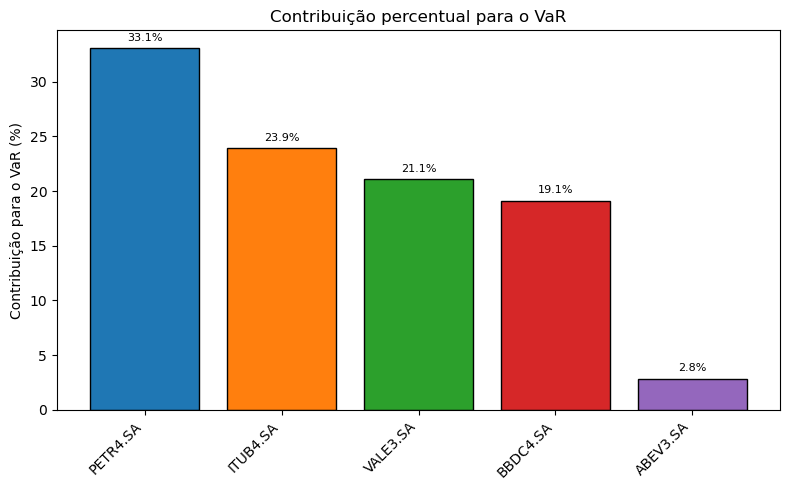

In [29]:
mvar, comp_var, pct = component_var(portfolio, var_mask)
pct_series = pd.Series(pct) 
print(mvar,comp_var,pct)
plot_component_var(pct_series)

## Correlação entre os ativos

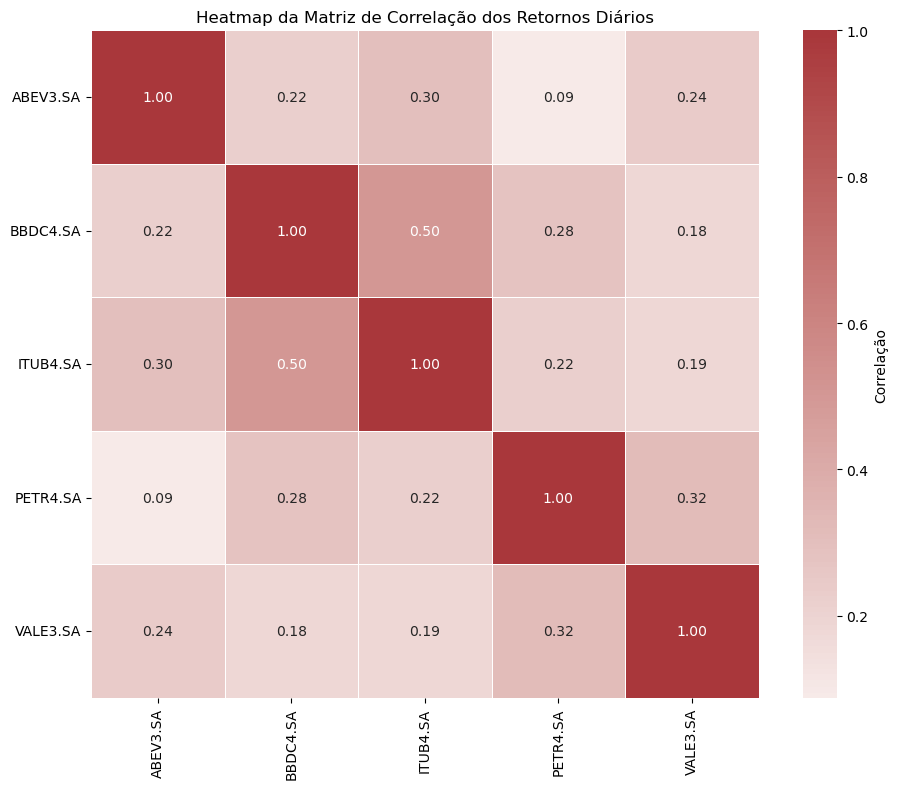

In [30]:
plot_heatmap_corr(portfolio)